In [1]:
# Imp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
# df=pd.read_csv("../input/2022-ukraine-russian-war/russia_losses_equipment.csv",parse_dates=['date'])

df=pd.read_csv("../input/indonesia-food-delivery-gofood-product-list/gofood_dataset.csv")


In [3]:
df.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,NaN,0,Sajian Susu Coklat Milo Plus Espresso Dengan R...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merchant_name   45195 non-null  object 
 1   merchant_area   45195 non-null  object 
 2   category        45195 non-null  object 
 3   display         45195 non-null  object 
 4   product         45195 non-null  object 
 5   price           45195 non-null  float64
 6   discount_price  2738 non-null   float64
 7   isDiscount      45195 non-null  int64  
 8   description     21720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


# Data Cleaning

In [5]:
df.isna().sum()

merchant_name         0
merchant_area         0
category              0
display               0
product               0
price                 0
discount_price    42457
isDiscount            0
description       23475
dtype: int64

In [6]:
df = df.fillna(0)
df.isna().sum()

merchant_name     0
merchant_area     0
category          0
display           0
product           0
price             0
discount_price    0
isDiscount        0
description       0
dtype: int64

----------------------------------------------------------------------------------------------------
# "Revenue Merchant Area Gofood" 
*withoutdiscount_price*

Text(0.5, 1.0, 'Revenue Merchant Area Gofood ***withoutdiscount_price**')

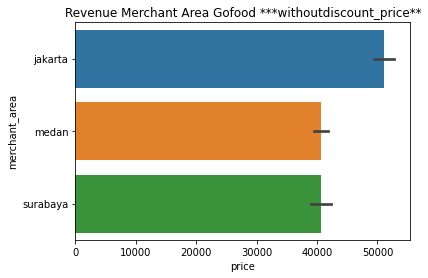

In [7]:
dftotal = df.groupby(['merchant_area']).sum().sort_values(by = 'price', ascending=False)
dftotal = dftotal.reset_index()
  
# plot barplot
sns.barplot(x = "price",
           y = "merchant_area",
           data = df)
plt.title("Revenue Merchant Area Gofood ***withoutdiscount_price**")

In [8]:
dfmean = df.groupby(['merchant_area']).sum()
dfmean = dfmean.mean(axis=1)
dfmean.head()

merchant_area
jakarta     2.561118e+08
medan       2.259406e+08
surabaya    2.213106e+08
dtype: float64

----------------------------------------------------------------------------------------------------
# TOP 10 Merchant Name revenue at Gofood
*withoutdiscount_price

In [9]:
dfname = df.groupby(['merchant_name','merchant_area']).sum().sort_values(by = 'price', ascending=False)
dfname.head(10)

,,price,discount_price,isDiscount
merchant_name,merchant_area,,,
"Holywings Backyard, Kemang",jakarta,54904300.0,0.0,0
Holywings Gold Basra,surabaya,47362040.0,0.0,0
"Holywings, Medan",medan,47074280.0,0.0,0
"Holywings, Kertajaya",surabaya,45946560.0,0.0,0
Suans Bakery,medan,36458150.0,0.0,0
"The Garrison, Kemang",jakarta,34962840.0,0.0,0
Grand Liberty Restaurant,medan,34894000.0,1226000.0,6
"Holland Bakery, Tropodo",surabaya,30873200.0,0.0,0
"Holland Bakery, Thamrin",surabaya,29390800.0,0.0,0


Text(0.5, 1.0, 'TOP 10 Merchant Name revenue at Gofood *withoutdiscount_price')

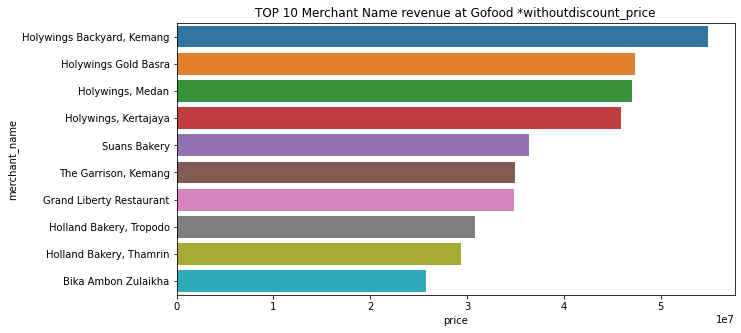

In [10]:
plt_1= plt.figure(figsize=(10,5))
dfnamevis = df.groupby(['merchant_name']).sum()
dfnamevis = pd.DataFrame(dfnamevis.sort_values(by = 'price', ascending=False))[0:10]
dfnamevis = dfnamevis.reset_index()
  
# plot barplot
sns.barplot(x = "price",
           y = "merchant_name",
           data = dfnamevis)

plt.title("TOP 10 Merchant Name revenue at Gofood *withoutdiscount_price")

----------------------------------------------------------------------------------------------------
# TOP 10 Revenue Merchant Name in Jakarta
*withoutdiscount_price

In [11]:
df1 = df[df['merchant_area'].str.contains('jakarta')]
df1 = df1.groupby(['merchant_name']).sum().sort_values(by = 'price', ascending=False)
df1.head(10)

,price,discount_price,isDiscount
merchant_name,,,
"Holywings Backyard, Kemang",54904300.0,0.0,0
"The Garrison, Kemang",34962840.0,0.0,0
"Holland Bakery, Ciomas",24141400.0,0.0,0
"Starbucks, Sudirman Bogor",23792000.0,6871000.0,82
"Dapur Cokelat, Depok",19352000.0,0.0,0
"Chateraise, Senayan City",19263250.0,220000.0,7
"Dapur Cokelat, Ciracas",17918000.0,0.0,0
"Bakerman, SCBD",17091875.0,0.0,0
Oguri Artisanal Cafe,16204500.0,128750.0,1


Text(0.5, 1.0, 'TOP 10 Revenue Merchant Name in Jakarta *withoutdiscount_price')

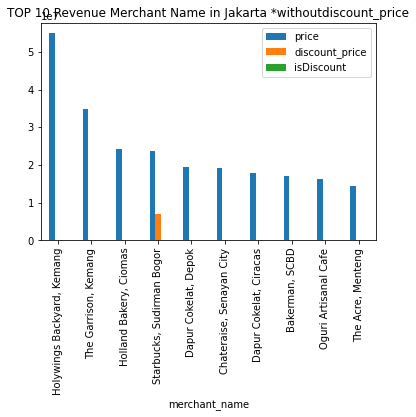

In [12]:
df1 = df[df['merchant_area'].str.contains('jakarta')]
df1 = df1.groupby(['merchant_name']).sum().sort_values(by = 'price', ascending=False)
df1.head(10).plot(kind='bar')

plt.title("TOP 10 Revenue Merchant Name in Jakarta *withoutdiscount_price")

----------------------------------------------------------------------------------------------------
# "TOP 10 Revenue Product at Starbucks, Sudirman Bogor"
*withoutdiscount_price

In [13]:
dfsbc = df[ df['merchant_name'].str.contains('Starbucks, Sudirman Bogor')]
dfsbc = dfsbc.groupby(['product']).sum().sort_values(by = 'price', ascending=False)
dfsbc.count()

price             144
discount_price    144
isDiscount        144
dtype: int64

In [14]:
dfsbc = df[ df['merchant_name'].str.contains('Starbucks, Sudirman Bogor')]
dfsbc = dfsbc.groupby(['product']).sum().sort_values(by = 'price', ascending=False)
dfsbc.head(10)

,price,discount_price,isDiscount
product,,,
Starbucks Mint Collection,810000.0,0.0,0
Starbucks Bling Collection,800000.0,0.0,0
Starbucks Tumbler Collection,750000.0,0.0,0
Starbucks Translucent & Green Collection,510000.0,0.0,0
Starbucks Gifting Package,450000.0,309800.0,2
2 Java Chip Frappuccino + 2 Caramel Macchiato,440000.0,299800.0,2
2 Green Tea Frappuccino + 2 Caramel Macchiato,440000.0,299800.0,2
2 Liter Special Price,400000.0,259800.0,2
New! Starbucks 6 x 250 ml,400000.0,298000.0,2


Text(0.5, 1.0, 'TOP 10 Revenue Product at Starbucks, Sudirman Bogor *withoutdiscount_price')

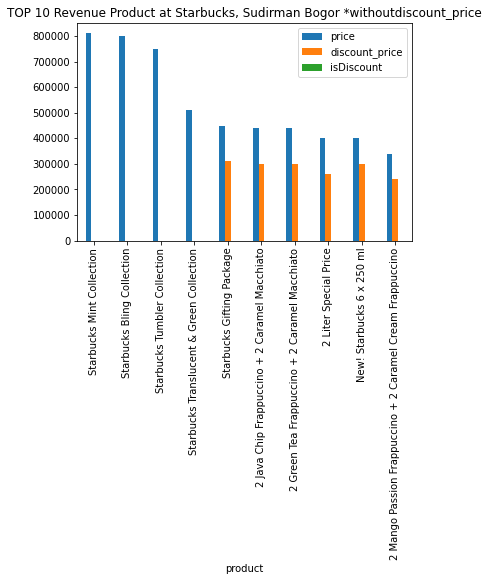

In [15]:
dfsbcvis = df[df['merchant_name'].str.contains('Starbucks, Sudirman Bogor')]
dfsbcvis = dfsbcvis.groupby(['product']).sum().sort_values(by = 'price', ascending=False)
dfsbcvis.head(10).plot(kind='bar')
plt.title("TOP 10 Revenue Product at Starbucks, Sudirman Bogor *withoutdiscount_price")

----------------------------------------------------------------------------------------------------
# Revenue Product "Starbucks Mint Collection" at Some Area
 *without discount_price

In [16]:
dfsmc = df[ df['product'].str.contains('Starbucks Mint Collection')]
dfsmc = dfsmc.groupby(['merchant_area']).sum().sort_values(by = 'price', ascending=False)
dfsmc.head()

,price,discount_price,isDiscount
merchant_area,,,
jakarta,810000.0,0.0,0
medan,405000.0,0.0,0


In [17]:
dfsmc = df[ df['product'].str.contains('Starbucks Mint Collection')]
dfsmc = dfsmc.groupby(['merchant_area'])
dfsmc.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
12659,"Starbucks, Sudirman Bogor",jakarta,Kopi/Roti/Minuman,Merchandise,Starbucks Mint Collection,405000.0,0.0,0,A. Waterbottle 12 Oz Ss Mint \nB. Waterbottl...
12803,"Starbucks, Sudirman Bogor",jakarta,Roti/Minuman/Kopi,Merchandise,Starbucks Mint Collection,405000.0,0.0,0,A. Waterbottle 12 Oz Ss Mint \nB. Waterbottl...
27482,"Starbucks, Multatuli Medan",medan,Kopi/Sweets/Roti/Minuman,Merchandise,Starbucks Mint Collection,405000.0,0.0,0,A. Waterbottle 12 Oz Ss Mint \nB. Waterbottl...


----------------------------------------------------------------------------------------------------
# Most Ordered Product of Coffee in Gofood

In [18]:
dfkopilaris = df[df['product'].str.contains('Kopi', 'Coffee')]
dfkopilaris = dfkopilaris.groupby(['merchant_name']).count().sort_values(by = 'product', ascending = False)
dfkopilaris.head()

,merchant_area,category,display,product,price,discount_price,isDiscount,description
merchant_name,,,,,,,,
"Kedai Kopi Kulo, Setiabudi",31,31,31,31,31,31,31,31
"Kopi Yor, Medan",24,24,24,24,24,24,24,24
"Serambi Kuphi, Ksatria",22,22,22,22,22,22,22,22
Tettakopi,16,16,16,16,16,16,16,16
Dapoer Sedap Wangi,16,16,16,16,16,16,16,16


----------------------------------------------------------------------------------------------------
# Revenue of most ordered product coffee in Gofood

In [19]:
dflaris = df[df['merchant_name'].str.contains('Kedai Kopi Kulo, Setiabudi')]
dflaris = dflaris.groupby(['merchant_name']).sum().sort_values(by = 'price', ascending = False)
dflaris.head()

,price,discount_price,isDiscount
merchant_name,,,
"Kedai Kopi Kulo, Setiabudi",2935000.0,0.0,0
